# Manipulation des donnnées - Introduction

On fait une première étude rapide des données 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from datetime import (
    datetime as DateTime, 
    timedelta as TimeDelta)

# Importation de la base de donnée

In [2]:
# on commence par lire la table 
df_global = pd.read_csv("../data/complete_merged_dataset.csv", sep = ";")

# sur chaque date la fin n'est pas indispensable car l'heure est toujours la même, on peut donc enlever cette partie pour simplifier. 
parser = lambda x: x[:-21]
df_global["horodate"] = df_global["horodate"].map(parser)

# puis on peut utiliser un type spécialisé dans le traitement des dates : 
df_global["horodate"] = pd.to_datetime(df_global["horodate"])

# dans un premier temps les colonnes dq et top ne nous intéressent pas : 
del df_global["dq"]
del df_global["top"]

# on rename la colonne percentile_50 
df_global = df_global.rename(columns = {"percentile_50": "prediction"})

# de plus on aimerait que les id_client se suivent, par exemple 8 n'est pas présent. 
id_client = df_global["id_client"].unique()
id_rename = {} 
for i in range(len(id_client)): 
    id_rename[str(id_client[i])] = i +1 
client_rename = lambda x : id_rename[str(x)]
df_global["id_client"] = df_global["id_client"].map(client_rename)

In [3]:
# pour récupérer le jour / mois / année : 
df_global["horodate"].dt.day
df_global["horodate"].dt.month
df_global["horodate"].dt.year

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
38044    2023
38045    2023
38046    2023
38047    2023
38048    2023
Name: horodate, Length: 38049, dtype: int64

In [4]:
# on peut aussi partir du fichier enregistré 
df_global = pd.read_csv("../data/dataset_modify")
del df_global["Unnamed: 0"]
df_global["horodate"] = pd.to_datetime(df_global["horodate"])

## Analyse de la base de donnée

In [5]:
#df_global = df_global.set_index(["id_client", "horodate"])

In [6]:
df_global.index

RangeIndex(start=0, stop=38049, step=1)

# Etat des lieux des erreurs 

In [7]:
# on rajoute quelques colonnes pour les erreurs : 
df_global["error"] = df_global["real_consumption"] - df_global["forecasted_consumption"]
df_global["abs_error"] = np.abs(df_global["error"])

# on rajoute une colonne qui mesure l'erreur entre la consommation réelle et l'estimation de airliquide : 
df_global["corr_error"] = np.abs(df_global["real_consumption"] - df_global["prediction"])

# on fait un groupby sur les clients : 
df_byClient = df_global.groupby("id_client")

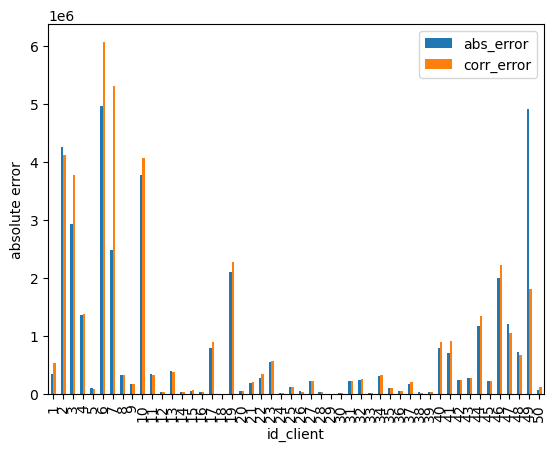

In [8]:
# visualisation des erreurs et des erreurs après correction par airliquide. 
df_global.pivot_table(values = ["abs_error", "corr_error"], index = "id_client", aggfunc=sum).plot.bar(ylabel = "absolute error");

In [9]:
def plot_consumption(n): 
    df_byClient.get_group(n).set_index("horodate").plot(y = ["forecasted_consumption", "real_consumption", "prediction"], title = f"Client {n}")

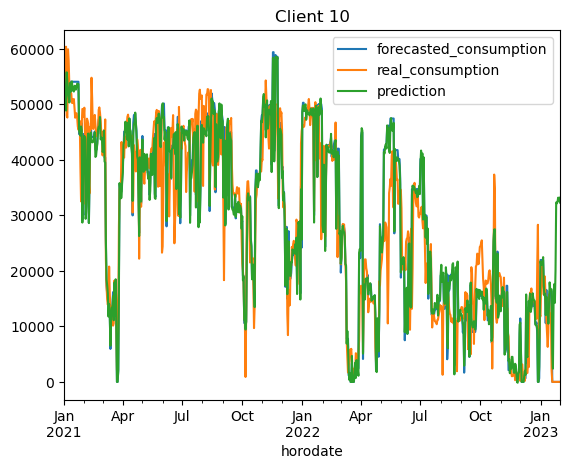

In [10]:
plot_consumption(10)

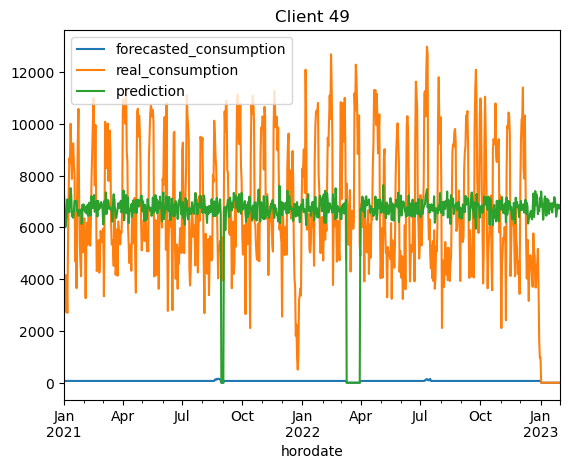

In [11]:
plot_consumption(49)

In [12]:
# visualiser les erreurs par périodes de l'année 
def visualize_error(n): 
    df_byClient.get_group(n).set_index("horodate").plot(y = ["error", "abs_error"], title = f"Client {n}")

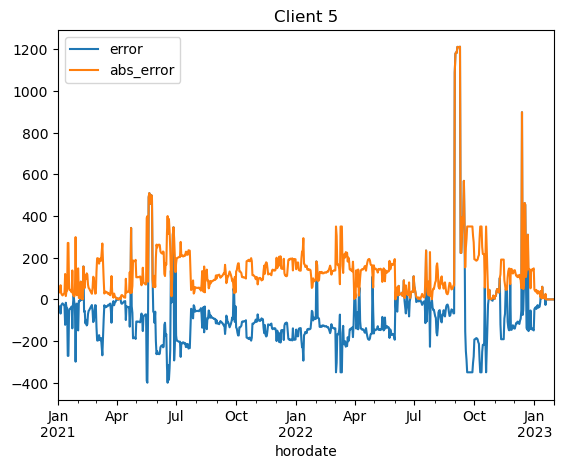

In [13]:
visualize_error(5)

In [14]:
# on veut trier les erreurs par mois. 
remove_day = lambda x : x.strftime("%Y-%m")
df_global["horodate-YM"] = df_global["horodate"].map(remove_day)

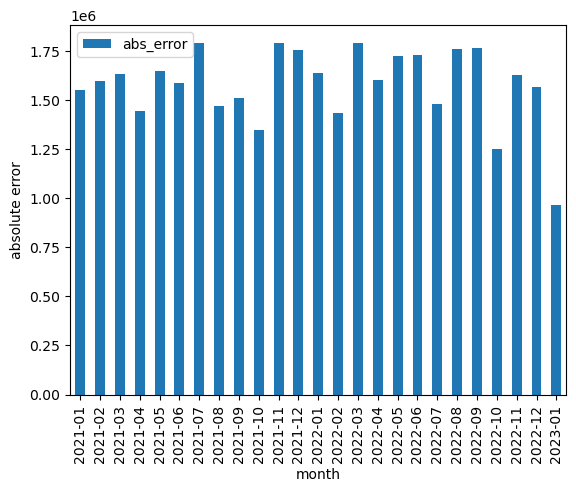

In [15]:
df_global.pivot_table(values = "abs_error", index = "horodate-YM", aggfunc=sum).plot.bar(xlabel = "month", ylabel = "absolute error"); 

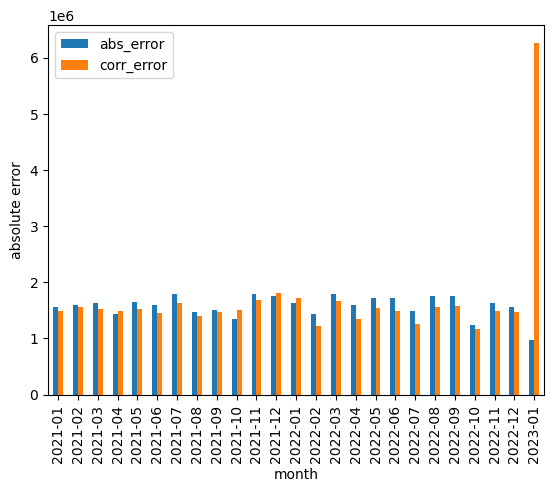

In [16]:
df_global.pivot_table(values = ["abs_error", "corr_error"], index = "horodate-YM", aggfunc=sum).plot.bar(xlabel = "month", ylabel = "absolute error"); 

In [17]:
bourse = pd.read_csv("../data/HYDROGENEDEFRANCE_2023-03-31-2.txt", sep = "\t").drop(["Unnamed: 7","devise"], axis = 1)

In [18]:
bourse

,date,ouv,haut,bas,clot,vol
0,24/06/2021 00:00,31.10,33.30,29.00,32.30,125861
1,25/06/2021 00:00,33.00,33.25,32.20,32.20,86472
2,28/06/2021 00:00,33.50,33.50,32.50,32.80,66981
3,29/06/2021 00:00,32.90,33.00,30.10,31.30,49774
4,30/06/2021 00:00,31.50,32.60,31.00,31.60,20883
...,...,...,...,...,...,...
454,27/03/2023 00:00,18.84,18.84,18.46,18.70,4082
455,28/03/2023 00:00,18.70,18.86,18.36,18.50,2755
456,29/03/2023 00:00,18.58,18.58,18.10,18.18,2171
457,30/03/2023 00:00,18.08,18.08,17.68,17.78,2667


In [19]:
bourse["date"]

0      24/06/2021 00:00
1      25/06/2021 00:00
2      28/06/2021 00:00
3      29/06/2021 00:00
4      30/06/2021 00:00
             ...       
454    27/03/2023 00:00
455    28/03/2023 00:00
456    29/03/2023 00:00
457    30/03/2023 00:00
458    31/03/2023 00:00
Name: date, Length: 459, dtype: object

In [20]:
df_global

,id_client,horodate,real_consumption,forecasted_consumption,prediction,error,abs_error,corr_error,horodate-YM
0,1,2021-01-01,8396.00,8400.0,8323.319457,-4.00,4.00,72.680543,2021-01
1,1,2021-01-02,8395.00,8400.0,8194.785384,-5.00,5.00,200.214616,2021-01
2,1,2021-01-03,8396.00,8400.0,8183.265980,-4.00,4.00,212.734020,2021-01
3,1,2021-01-04,8397.00,8400.0,8420.826672,-3.00,3.00,23.826672,2021-01
4,1,2021-01-05,8395.73,8400.0,8123.422185,-4.27,4.27,272.307815,2021-01
...,...,...,...,...,...,...,...,...,...
38044,50,2023-01-27,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01
38045,50,2023-01-28,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01
38046,50,2023-01-29,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01
38047,50,2023-01-30,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01


<Axes: >

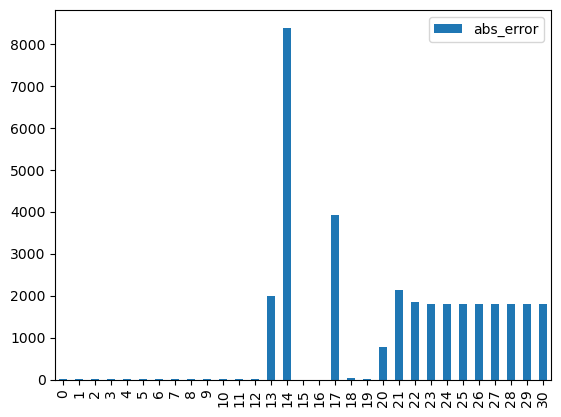

In [21]:
df_global.iloc[:31].plot.bar(y = "abs_error")

## Première régression

In [22]:
# on a besoin d'une librairie pour faire de la régression 
from sklearn.linear_model import LinearRegression

In [23]:
# on sépare le dataFrame en un dataFrame pour chaque client :
n = df_global["id_client"].max()
clients = [df_global.groupby("id_client").get_group(i).copy() for i in range(1,n+1)]

In [24]:
# pour qu'on puisse traiter les jours facilements on change un peu le format : 
reference_date = pd.to_datetime("2021-01-01")
for i in range(n): 
    clients[i]["jour"] = clients[i]["horodate"].map(lambda x: (x - reference_date).days)

In [25]:
# séparation des données de train / test : 
train_size = int(len(clients[0]) * 0.8)
train_data = [client[:train_size] for client in clients]
test_data = [client[train_size:] for client in clients]

In [26]:
# on utilise nos variables d'intérêt : 
X_train = [train_client[["jour", "forecasted_consumption"]] for train_client in train_data]
y_train = [train_client[["real_consumption"]] for train_client in train_data]

X_test = [test_client[["jour", "forecasted_consumption"]] for test_client in test_data]
y_test = [test_client[["real_consumption"]] for test_client in test_data]

In [27]:
# création des modèles : 
models = [LinearRegression() for _ in range(n)]
for i, model in enumerate(models): 
    model.fit(X_train[i], y_train[i])

In [28]:
y_pred = []
for i, model in enumerate(models) : 
    y_pred.append(model.predict(X_test[i]).reshape(len(X_test[i])))

## Création du modèle global : 

In [29]:
global_model = lambda i : models[i]

## Test des modèles :

(769875.9797102101, 1287599.7296035313)

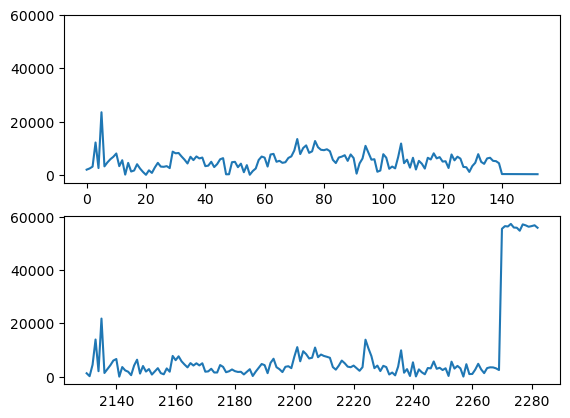

In [30]:
i = 2
fig, ax = plt.subplots(2, sharey=True)
ax[0].plot(abs(y_pred[i] - np.array(test_data[i]["real_consumption"])))
ax[1].plot(test_data[i]["corr_error"]); 
(abs(y_pred[i] - np.array(test_data[i]["real_consumption"])).sum(), test_data[i]["corr_error"].sum())

In [31]:
for i in range(n):
    if abs(y_pred[i] - np.array(test_data[i]["real_consumption"])).sum() - test_data[i]["corr_error"].sum() < 0 :
        print("+++")
    else :
        print("---")

---
+++
+++
+++
+++
+++
+++
---
---
+++
---
+++
+++
---
+++
+++
---
---
+++
+++
+++
+++
+++
+++
---
+++
+++
+++
+++
+++
---
---
+++
---
---
+++
+++
+++
---
+++
+++
+++
---
+++
---
+++
---
---
---
+++


## Ajout des données météos : 

In [32]:
meteo = pd.read_csv("../data/brussels 2021-01-01 to 2023-04-01.csv")

In [33]:
meteo = meteo.drop(["name", "sunrise", "sunset", "moonphase","icon","stations", "description", "conditions","severerisk"], axis = 1)

In [34]:
meteo["datetime"] = pd.to_datetime(meteo["datetime"])

In [35]:
meteo = meteo[meteo["datetime"] < pd.to_datetime("2023-02-01")] 

In [36]:
meteo.rename({"datetime": "horodate"}, axis = 1, inplace = True)

## Etude des corrélations pour savoir quelles variables garder 

In [37]:
i = 1
A = pd.concat([meteo.set_index("horodate"), clients[i].set_index("horodate")],axis = 1).drop(["horodate-YM",  "preciptype", "prediction", "error", "corr_error", "jour", "id_client"],axis = 1)
A

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,real_consumption,forecasted_consumption,abs_error
horodate,,,,,,,,,,,,,,,,,,,,,
2021-01-01,4.1,0.3,1.7,2.1,-1.8,0.0,0.6,92.6,0.782,100,...,249.2,1009.7,79.0,12.8,10.7,0.8,1,11872.00,20000.0,8128.00
2021-01-02,3.5,0.2,2.1,3.4,-2.8,0.4,0.6,89.8,0.023,100,...,223.1,1014.2,91.9,11.4,6.0,0.3,1,11795.00,20000.0,8205.00
2021-01-03,3.2,2.1,2.7,2.7,-1.6,0.3,0.6,86.4,0.000,0,...,40.1,1015.4,99.0,9.6,6.2,0.3,1,11750.00,20000.0,8250.00
2021-01-04,2.4,1.6,2.0,-1.0,-2.3,-1.7,0.5,89.8,0.566,100,...,40.8,1015.8,98.8,13.7,8.1,0.6,0,11915.00,18000.0,6085.00
2021-01-05,2.4,1.6,2.0,-0.3,-2.2,-1.4,0.2,87.9,0.014,100,...,45.3,1016.5,99.2,15.5,8.0,0.6,0,11411.51,18000.0,6588.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,5.1,3.0,4.0,2.0,-0.6,0.5,1.4,83.1,0.082,100,...,23.2,1026.8,97.3,10.4,14.0,1.3,1,0.00,0.0,0.00
2023-01-28,3.3,-2.0,1.6,1.9,-4.4,-0.7,-1.7,79.1,0.000,0,...,29.6,1030.8,70.9,10.3,34.3,2.9,3,0.00,0.0,0.00
2023-01-29,3.3,-3.3,0.2,-0.3,-6.3,-2.8,-1.6,88.4,0.078,100,...,210.2,1028.6,71.5,9.5,22.3,1.9,1,0.00,0.0,0.00


In [38]:
A.columns

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'real_consumption', 'forecasted_consumption',
       'abs_error'],
      dtype='object')

In [39]:
A.corr()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,real_consumption,forecasted_consumption,abs_error
tempmax,1.000000,0.892091,0.978040,0.993094,0.901191,0.973605,0.803287,-0.569332,-0.033142,-0.118842,...,-0.055828,0.010975,-0.396667,0.145572,0.639022,0.639453,0.659539,-0.130054,-0.021117,-0.112648
tempmin,0.892091,1.000000,0.961274,0.892279,0.991126,0.957515,0.941259,-0.284215,0.106328,0.093212,...,0.086014,-0.125599,-0.061167,0.118997,0.393934,0.395092,0.428872,-0.102601,0.011994,-0.105572
temp,0.978040,0.961274,1.000000,0.973408,0.963076,0.994750,0.883435,-0.468550,0.022165,-0.027033,...,0.003577,-0.048481,-0.260739,0.137668,0.558558,0.559324,0.579939,-0.124253,-0.013952,-0.117761
feelslikemax,0.993094,0.892279,0.973408,1.000000,0.903919,0.977365,0.810070,-0.551050,-0.030729,-0.128301,...,-0.047676,0.016062,-0.387117,0.143280,0.631632,0.632140,0.653519,-0.141337,-0.026979,-0.124556
feelslikemin,0.901191,0.991126,0.963076,0.903919,1.000000,0.967868,0.940298,-0.289081,0.081211,0.066022,...,0.079177,-0.080563,-0.098522,0.115101,0.417802,0.419053,0.453371,-0.111729,0.006101,-0.115783
feelslike,0.973605,0.957515,0.994750,0.977365,0.967868,1.000000,0.887869,-0.450616,0.015281,-0.042456,...,0.007368,-0.025203,-0.264153,0.131868,0.558091,0.558941,0.581893,-0.138771,-0.025436,-0.128611
dew,0.803287,0.941259,0.883435,0.810070,0.940298,0.887869,1.000000,-0.006275,0.187356,0.164004,...,0.155778,-0.152748,0.050687,0.039956,0.246044,0.247803,0.282709,-0.083423,0.035000,-0.092101
humidity,-0.569332,-0.284215,-0.468550,-0.551050,-0.289081,-0.450616,-0.006275,1.000000,0.313555,0.381985,...,0.277408,-0.186006,0.642003,-0.267608,-0.737291,-0.735479,-0.722504,0.111475,0.086004,0.074003
precip,-0.033142,0.106328,0.022165,-0.030729,0.081211,0.015281,0.187356,0.313555,1.000000,0.235720,...,0.140410,-0.357110,0.307918,-0.044979,-0.208195,-0.207993,-0.193793,0.073151,0.096676,0.049496
precipprob,-0.118842,0.093212,-0.027033,-0.128301,0.066022,-0.042456,0.164004,0.381985,0.235720,1.000000,...,0.289680,-0.309047,0.458628,-0.085931,-0.321928,-0.320693,-0.280128,0.072554,0.063324,-0.001821


### La température ? 

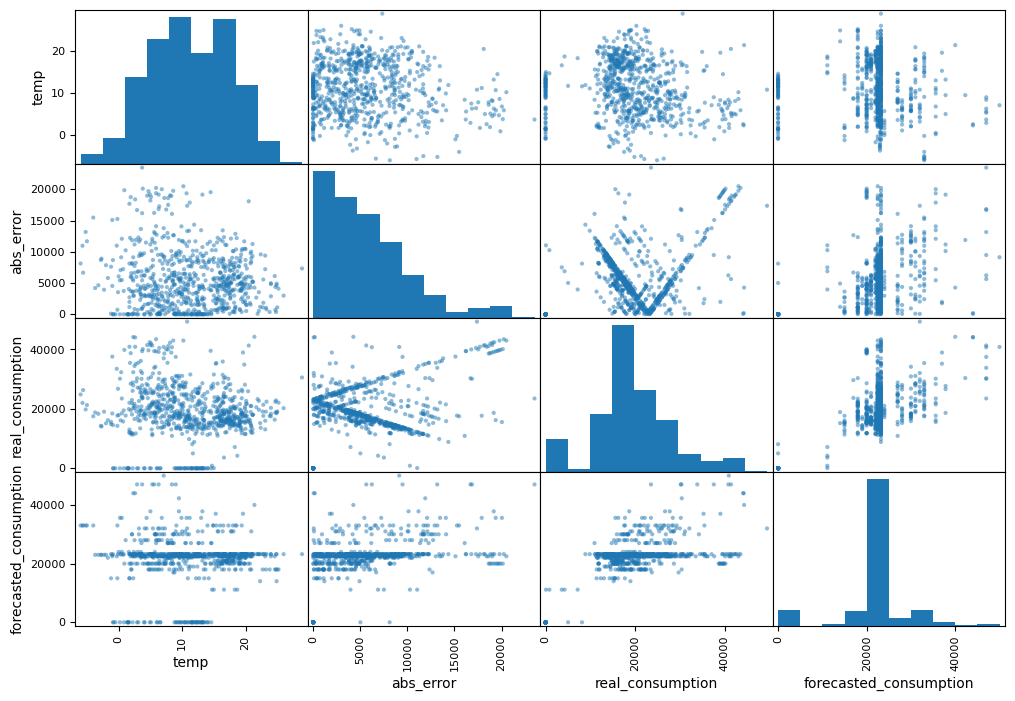

In [40]:
attributes = ["temp", "abs_error", "real_consumption", "forecasted_consumption"]
pd.plotting.scatter_matrix(A[attributes], figsize = (12, 8));

La température ne semble pas être vraiment correlée à l'erreur. 

### Le ressenti ? 

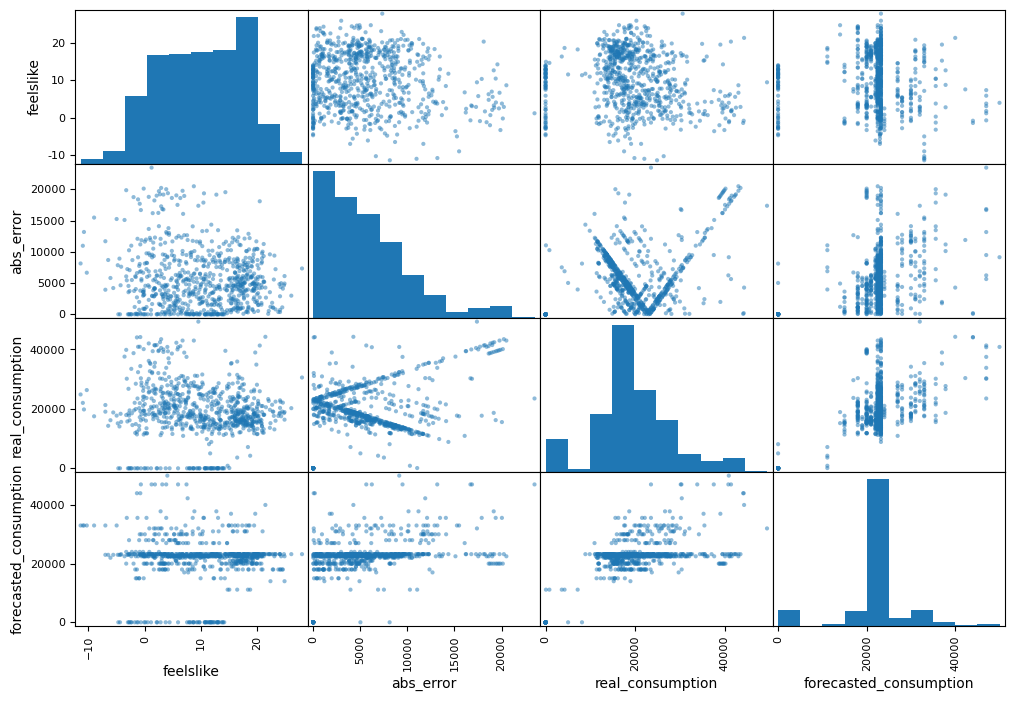

In [41]:
attributes = ["feelslike", "abs_error", "real_consumption", "forecasted_consumption"]
pd.plotting.scatter_matrix(A[attributes], figsize = (12, 8));

### L'humidité ? 

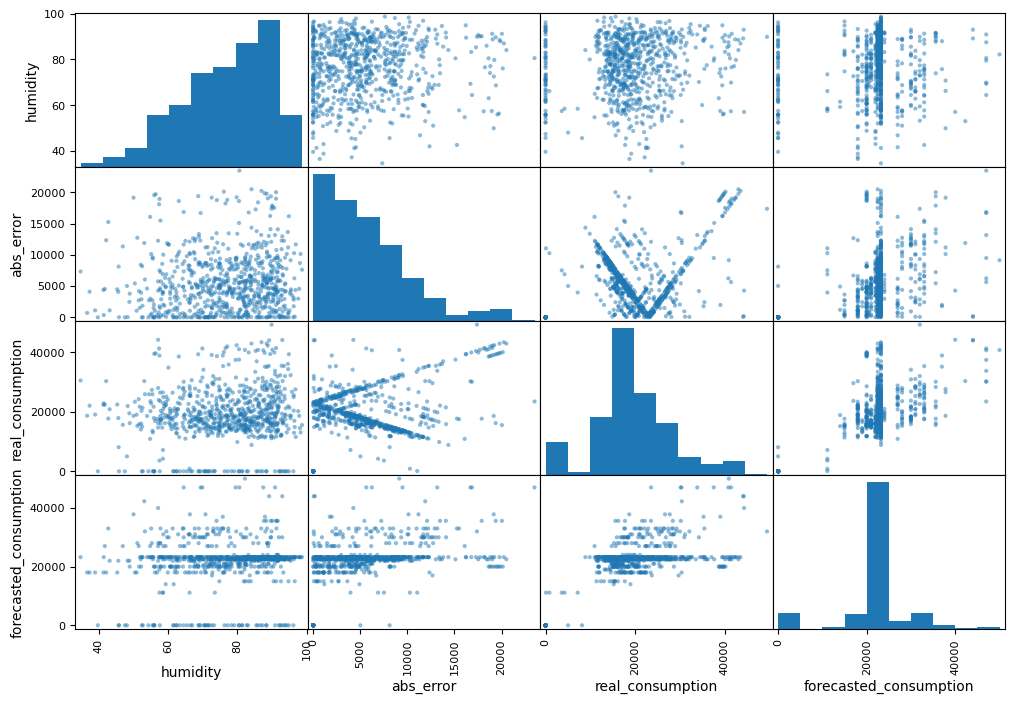

In [42]:
attributes = ["humidity", "abs_error", "real_consumption", "forecasted_consumption"]
pd.plotting.scatter_matrix(A[attributes], figsize = (12, 8));

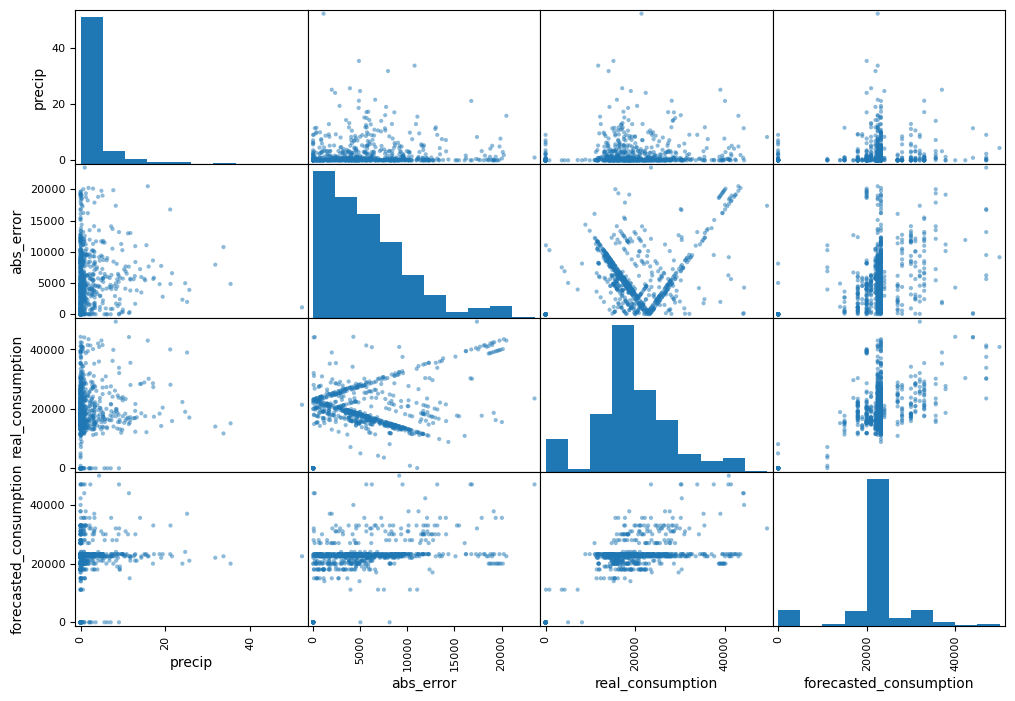

In [43]:
attributes = ["precip", "abs_error", "real_consumption", "forecasted_consumption"]
pd.plotting.scatter_matrix(A[attributes], figsize = (12, 8));

## On essaye de rajouter la température et l'humitité comme variable

In [44]:
client1 = clients[0].copy()

In [45]:
client1.drop(["id_client", "prediction", "error", "corr_error", "horodate-YM"], axis = 1, inplace = True)

In [46]:
pd.concat([client1.set_index("horodate"), meteo.set_index("horodate")], axis = 1).drop(["tempmax", "tempmin", "feelslikemax", "feelslikemin", "dew"], axis = 1)

,real_consumption,forecasted_consumption,abs_error,jour,temp,feelslike,humidity,precip,precipprob,precipcover,...,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
horodate,,,,,,,,,,,,,,,,,,,,,
2021-01-01,8396.00,8400.0,4.00,0,1.7,0.0,92.6,0.782,100,4.17,...,0.0,21.4,10.0,249.2,1009.7,79.0,12.8,10.7,0.8,1
2021-01-02,8395.00,8400.0,5.00,1,2.1,0.4,89.8,0.023,100,8.33,...,0.0,21.4,11.3,223.1,1014.2,91.9,11.4,6.0,0.3,1
2021-01-03,8396.00,8400.0,4.00,2,2.7,0.3,86.4,0.000,0,0.00,...,0.0,32.1,14.9,40.1,1015.4,99.0,9.6,6.2,0.3,1
2021-01-04,8397.00,8400.0,3.00,3,2.0,-1.7,89.8,0.566,100,25.00,...,0.0,32.3,17.7,40.8,1015.8,98.8,13.7,8.1,0.6,0
2021-01-05,8395.73,8400.0,4.27,4,2.0,-1.4,87.9,0.014,100,4.17,...,0.0,32.2,15.0,45.3,1016.5,99.2,15.5,8.0,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,0.00,0.0,0.00,756,4.0,0.5,83.1,0.082,100,8.33,...,0.0,39.3,20.7,23.2,1026.8,97.3,10.4,14.0,1.3,1
2023-01-28,0.00,0.0,0.00,757,1.6,-0.7,79.1,0.000,0,0.00,...,0.0,28.6,11.2,29.6,1030.8,70.9,10.3,34.3,2.9,3
2023-01-29,0.00,0.0,0.00,758,0.2,-2.8,88.4,0.078,100,4.17,...,0.0,41.2,21.1,210.2,1028.6,71.5,9.5,22.3,1.9,1


## Ajout des données du CAC 40 

In [47]:
cac = pd.read_csv("../data/^FCHI.csv")
cac["horodate"] = pd.to_datetime(cac["Date"])
cac = cac.drop(["High", "Low", "Date", "Close", "Adj Close", "Volume"], axis = 1)
cac = cac[cac["horodate"] <= pd.to_datetime("2023-01-31")]

In [48]:
df_global_with_cac = df_global.copy()

In [49]:
df_global_with_cac = pd.merge(df_global_with_cac, cac, on = ["horodate"], how = "left").sort_values(["id_client", "horodate"]).dropna()

In [50]:
# on sépare le dataFrame en un dataFrame pour chaque client :
n = df_global["id_client"].max()
clients_with_cac = [df_global_with_cac.groupby("id_client").get_group(i).copy() for i in range(1,n+1)]

In [51]:
# pour qu'on puisse traiter les jours facilements on change un peu le format : 
reference_date = pd.to_datetime("2021-01-01")
for i in range(n): 
    clients_with_cac[i]["jour"] = clients_with_cac[i]["horodate"].map(lambda x: (x - reference_date).days)

In [52]:
# séparation des données de train / test : 
train_size = int(len(clients_with_cac[0]) * 0.8)
train_data = [client[:train_size] for client in clients_with_cac]
test_data = [client[train_size:] for client in clients_with_cac]

In [53]:
# on utilise nos variables d'intérêt : 
X_train = [train_client[["jour", "forecasted_consumption", "Open"]] for train_client in train_data]
y_train = [train_client[["real_consumption"]] for train_client in train_data]

X_test = [test_client[["jour", "forecasted_consumption", "Open"]] for test_client in test_data]
y_test = [test_client[["real_consumption"]] for test_client in test_data]

In [54]:
# création des modèles : 
models = [LinearRegression() for _ in range(n)]
for i, model in enumerate(models): 
    model.fit(X_train[i], y_train[i])

In [55]:
y_pred = []
for i, model in enumerate(models) : 
    y_pred.append(model.predict(X_test[i]).reshape(len(X_test[i])))

In [56]:
global_model = lambda i : models[i]

(57841.05821981934, 65578.38132692585)

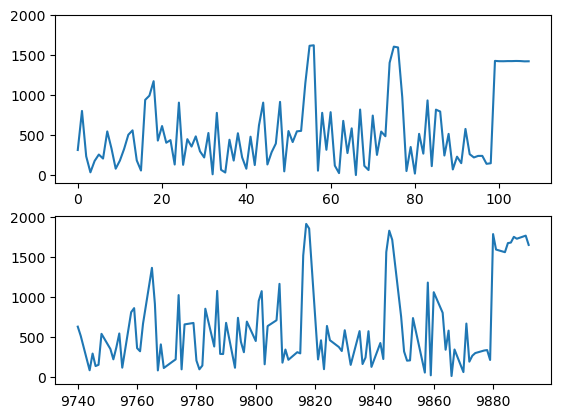

In [57]:
i =12
fig, ax = plt.subplots(2, sharey=True)
ax[0].plot(abs(y_pred[i] - np.array(test_data[i]["real_consumption"])))
ax[1].plot(test_data[i]["corr_error"]);
(abs(y_pred[i] - np.array(test_data[i]["real_consumption"])).sum(), test_data[i]["corr_error"].sum())

In [58]:
for i in range(n):
    if abs(y_pred[i] - np.array(test_data[i]["real_consumption"])).sum() - test_data[i]["corr_error"].sum() < 0 :
        print("+++")
    else :
        print("---")

+++
+++
+++
+++
---
+++
+++
---
---
+++
---
+++
+++
---
---
+++
---
---
+++
+++
+++
+++
+++
+++
---
+++
+++
+++
+++
+++
---
---
+++
---
---
+++
+++
+++
---
+++
+++
+++
+++
+++
---
+++
---
---
---
---


In [59]:
meteo

,horodate,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2021-01-01,4.1,0.3,1.7,2.1,-1.8,0.0,0.6,92.6,0.782,...,0.0,21.4,10.0,249.2,1009.7,79.0,12.8,10.7,0.8,1
1,2021-01-02,3.5,0.2,2.1,3.4,-2.8,0.4,0.6,89.8,0.023,...,0.0,21.4,11.3,223.1,1014.2,91.9,11.4,6.0,0.3,1
2,2021-01-03,3.2,2.1,2.7,2.7,-1.6,0.3,0.6,86.4,0.000,...,0.0,32.1,14.9,40.1,1015.4,99.0,9.6,6.2,0.3,1
3,2021-01-04,2.4,1.6,2.0,-1.0,-2.3,-1.7,0.5,89.8,0.566,...,0.0,32.3,17.7,40.8,1015.8,98.8,13.7,8.1,0.6,0
4,2021-01-05,2.4,1.6,2.0,-0.3,-2.2,-1.4,0.2,87.9,0.014,...,0.0,32.2,15.0,45.3,1016.5,99.2,15.5,8.0,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2023-01-27,5.1,3.0,4.0,2.0,-0.6,0.5,1.4,83.1,0.082,...,0.0,39.3,20.7,23.2,1026.8,97.3,10.4,14.0,1.3,1
757,2023-01-28,3.3,-2.0,1.6,1.9,-4.4,-0.7,-1.7,79.1,0.000,...,0.0,28.6,11.2,29.6,1030.8,70.9,10.3,34.3,2.9,3
758,2023-01-29,3.3,-3.3,0.2,-0.3,-6.3,-2.8,-1.6,88.4,0.078,...,0.0,41.2,21.1,210.2,1028.6,71.5,9.5,22.3,1.9,1
759,2023-01-30,8.1,3.2,6.1,4.9,-0.8,2.8,3.2,82.7,0.151,...,0.0,46.7,27.2,265.7,1023.0,80.4,9.9,39.9,3.6,3


### Ajout de la météo

In [60]:
meteo = meteo[["horodate", "temp"]]

In [61]:
df_global_with_cac_meteo = df_global_with_cac.copy()
df_global_with_cac_meteo = pd.merge(df_global_with_cac_meteo, meteo, on = ["horodate"], how = "left").sort_values(["id_client", "horodate"]).dropna()

In [62]:
# on sépare le dataFrame en un dataFrame pour chaque client :
n = df_global["id_client"].max()
clients_with_cac_meteo = [df_global_with_cac_meteo.groupby("id_client").get_group(i).copy() for i in range(1,n+1)]

In [63]:
# pour qu'on puisse traiter les jours facilements on change un peu le format : 
reference_date = pd.to_datetime("2021-01-01")
for i in range(n): 
    clients_with_cac_meteo[i]["jour"] = clients_with_cac_meteo[i]["horodate"].map(lambda x: (x - reference_date).days)

In [64]:
# séparation des données de train / test : 
train_size = int(len(clients_with_cac_meteo[0]) * 0.8)
train_data = [client[:train_size] for client in clients_with_cac_meteo]
test_data = [client[train_size:] for client in clients_with_cac_meteo]

In [65]:
# on utilise nos variables d'intérêt : 
X_train = [train_client[["jour", "forecasted_consumption", "Open", "temp"]] for train_client in train_data]
y_train = [train_client[["real_consumption"]] for train_client in train_data]

X_test = [test_client[["jour", "forecasted_consumption", "Open", "temp"]] for test_client in test_data]
y_test = [test_client[["real_consumption"]] for test_client in test_data]

In [66]:
# création des modèles : 
models = [LinearRegression() for _ in range(n)]
for i, model in enumerate(models): 
    model.fit(X_train[i], y_train[i])

In [67]:
y_pred = []
for i, model in enumerate(models) : 
    y_pred.append(model.predict(X_test[i]).reshape(len(X_test[i])))

(58028.59169440987, 65578.38132692585)

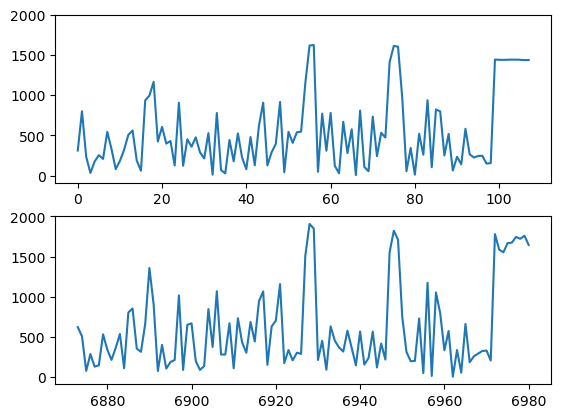

In [68]:
i = 12
fig, ax = plt.subplots(2, sharey=True)
ax[0].plot(abs(y_pred[i] - np.array(test_data[i]["real_consumption"])))
ax[1].plot(test_data[i]["corr_error"]);
(abs(y_pred[i] - np.array(test_data[i]["real_consumption"])).sum(), test_data[i]["corr_error"].sum())

## Essai avec SVM

In [117]:
df_global_with_cac = df_global.copy()

In [118]:
df_global_with_cac = pd.merge(df_global_with_cac, cac, on = ["horodate"], how = "left").sort_values(["id_client", "horodate"]).dropna()

In [121]:
# pour qu'on puisse traiter les jours facilements on change un peu le format : 
reference_date = pd.to_datetime("2021-01-01")
for i in range(n): 
    clients_with_cac[i]["jour"] = clients_with_cac[i]["horodate"].map(lambda x: (x - reference_date).days)

In [90]:
# séparation des données de train / test : 
train_size = int(len(clients_with_cac[0]) * 0.8)
train_data = [client[:train_size] for client in clients_with_cac]
test_data = [client[train_size:] for client in clients_with_cac]

In [104]:
# on utilise nos variables d'intérêt : 
X_train = [train_client[["jour", "forecasted_consumption"]] for train_client in train_data]
y_train = [train_client[["real_consumption"]] for train_client in train_data]

X_test = [test_client[["jour", "forecasted_consumption"]] for test_client in test_data]
y_test = [test_client[["real_consumption"]] for test_client in test_data]

In [100]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [129]:
# Instancier un classifieur SVM avec un noyau linéaire
clf = SVC(kernel='linear', C=1, random_state=42)

# Adapter le classifieur aux données d'apprentissage
clf.fit(X_train[0], y_train[0])

# Prédire les classes de l'ensemble de test
y_pred = clf.predict(X_test[0])

# Calculer l'exactitude de la prédiction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/opt/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [112]:
X_train[0]

,jour,forecasted_consumption
3,3,8400.0
4,4,8400.0
5,5,8400.0
6,6,8400.0
7,7,8400.0
...,...,...
601,601,8400.0
602,602,8400.0
605,605,8400.0
606,606,8400.0


## Essai avec SVM

In [113]:
df_global_with_cac = df_global.copy()

In [114]:
df_global_with_cac = pd.merge(df_global_with_cac, cac, on = ["horodate"], how = "left").sort_values(["id_client", "horodate"]).dropna()

In [122]:
# pour qu'on puisse traiter les jours facilements on change un peu le format : 
reference_date = pd.to_datetime("2021-01-01")
for i in range(n): 
    clients_with_cac[i]["jour"] = clients_with_cac[i]["horodate"].map(lambda x: (x - reference_date).days)

In [123]:
# séparation des données de train / test : 
train_size = int(len(clients_with_cac[0]) * 0.8)
train_data = [client[:train_size] for client in clients_with_cac]
test_data = [client[train_size:] for client in clients_with_cac]

In [124]:
# on utilise nos variables d'intérêt : 
X_train = [train_client[["jour", "forecasted_consumption"]] for train_client in train_data]
y_train = [train_client[["real_consumption"]] for train_client in train_data]

X_test = [test_client[["jour", "forecasted_consumption"]] for test_client in test_data]
y_test = [test_client[["real_consumption"]] for test_client in test_data]

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

In [128]:
rf.fit(X_train[0], y_train[0])

/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_59433/2709535312.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train[0], y_train[0])


ValueError: Unknown label type: 'continuous'

## Valeur du gaz naturel

In [130]:
df_global_with_gas = df_global_with_cac.copy()

In [138]:
gas = pd.read_csv("../data/ngpf_data.csv.xls", sep = ",")

In [139]:
gas

,Day,Price in Dollars per Million Btu
0,1/3/2022,4.36
1,28/2/2022,4.46
2,25/2/2022,4.63
3,24/2/2022,4.78
4,23/2/2022,4.59
...,...,...
6316,13/1/1997,4.00
6317,10/1/1997,3.92
6318,9/1/1997,3.61
6319,8/1/1997,3.80


In [141]:
df_global

,id_client,horodate,real_consumption,forecasted_consumption,prediction,error,abs_error,corr_error,horodate-YM
0,1,2021-01-01,8396.00,8400.0,8323.319457,-4.00,4.00,72.680543,2021-01
1,1,2021-01-02,8395.00,8400.0,8194.785384,-5.00,5.00,200.214616,2021-01
2,1,2021-01-03,8396.00,8400.0,8183.265980,-4.00,4.00,212.734020,2021-01
3,1,2021-01-04,8397.00,8400.0,8420.826672,-3.00,3.00,23.826672,2021-01
4,1,2021-01-05,8395.73,8400.0,8123.422185,-4.27,4.27,272.307815,2021-01
...,...,...,...,...,...,...,...,...,...
38044,50,2023-01-27,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01
38045,50,2023-01-28,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01
38046,50,2023-01-29,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01
38047,50,2023-01-30,0.00,0.0,0.000000,0.00,0.00,0.000000,2023-01
